### Task 1: Importing libraries and Exploring the Dataset.

In [1]:
#Standard Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Mlxtend libraries
from mlxtend.feature_selection import SequentialFeatureSelector
#Scikit Learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error , precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif , VarianceThreshold
#Model Deployment Libraries
import joblib

In [2]:
#Reading Data
df = pd.read_csv("Personal Bank Loan Classification.csv")
#Overview on datatype of the features in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [3]:
#checking Null values in each column
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [4]:
#checking Duplicated values in each column
df.duplicated().sum()

0

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project
### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

C:\Users\Abdo Tarek\AppData\Local\Temp\ipykernel_2132\2130170847.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


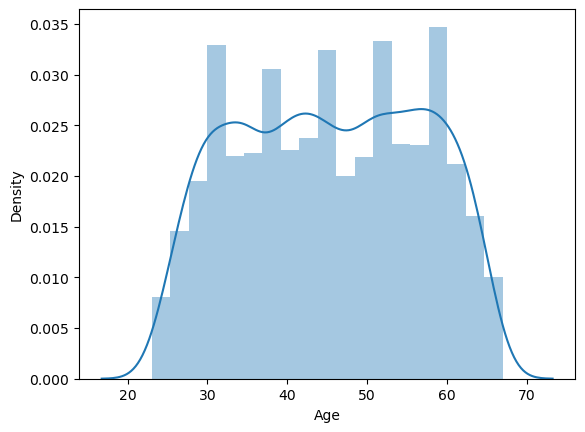

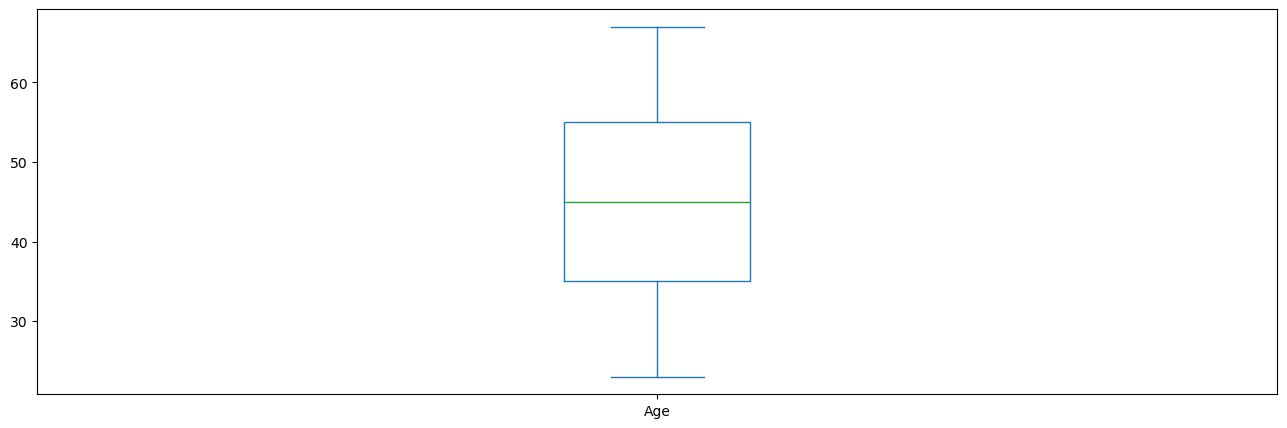

In [5]:
sns.distplot(df['Age'])
plt.show()
df['Age'].plot.box(figsize=(16, 5))
plt.show()

C:\Users\Abdo Tarek\AppData\Local\Temp\ipykernel_2132\1455653475.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Experience'])


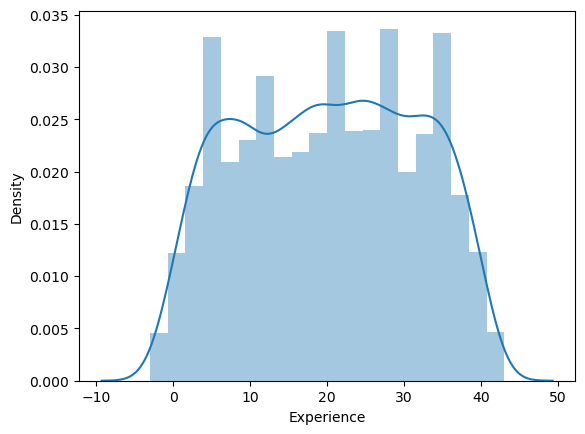

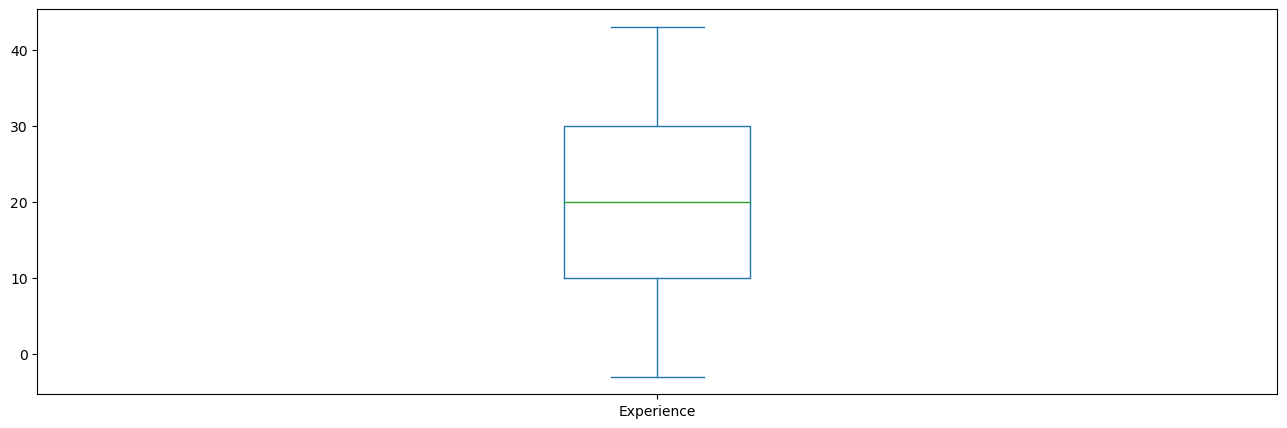

In [6]:
sns.distplot(df['Experience'])
plt.show()
df['Experience'].plot.box(figsize=(16, 5))
plt.show()

C:\Users\Abdo Tarek\AppData\Local\Temp\ipykernel_2132\4042621268.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'])


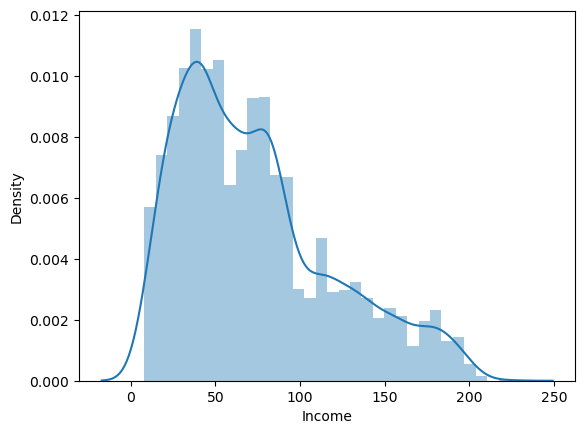

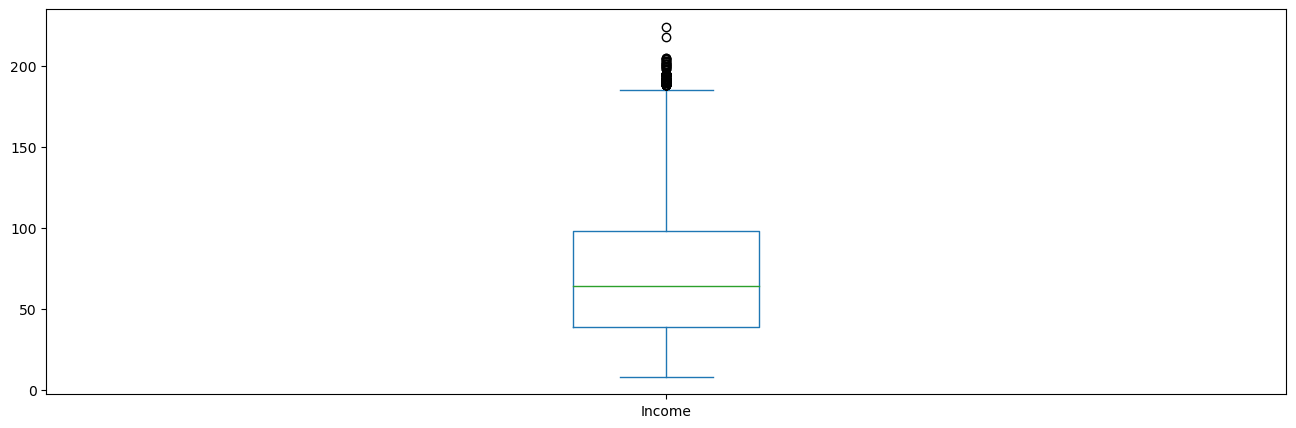

In [7]:
sns.distplot(df['Income'])
plt.show()
df['Income'].plot.box(figsize=(16, 5))
plt.show()

C:\Users\Abdo Tarek\AppData\Local\Temp\ipykernel_2132\2515059409.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CCAvg'])


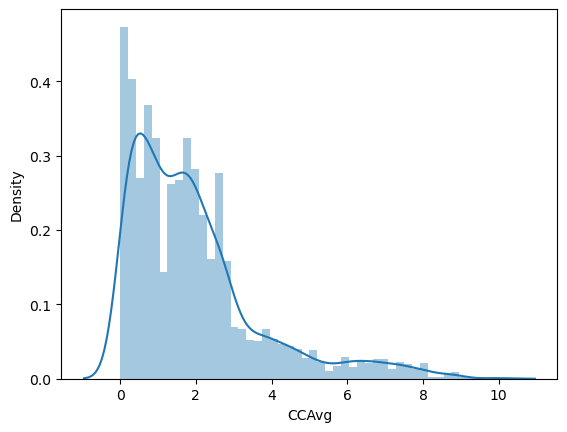

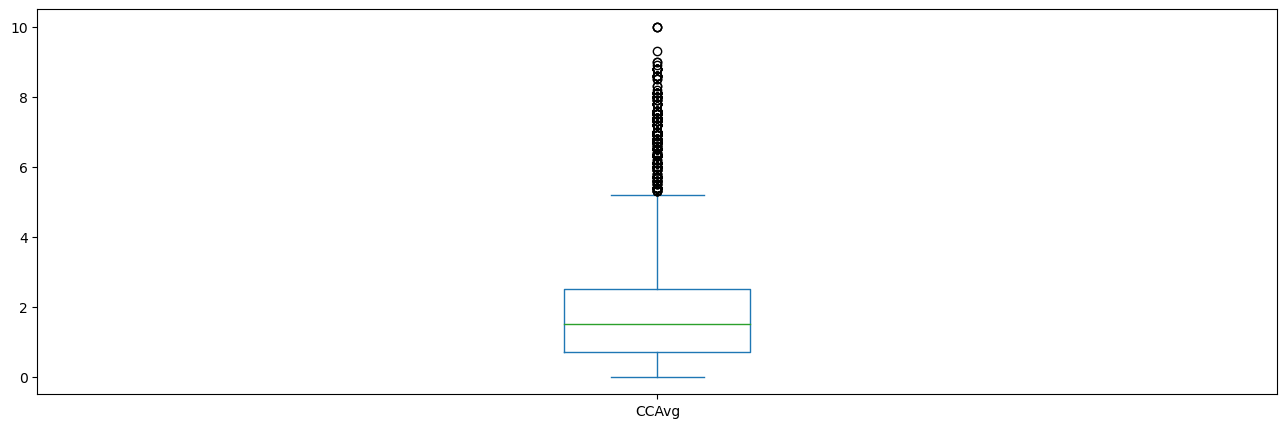

In [8]:
sns.distplot(df['CCAvg'])
plt.show()
df['CCAvg'].plot.box(figsize=(16, 5))
plt.show()

C:\Users\Abdo Tarek\AppData\Local\Temp\ipykernel_2132\2915624884.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mortgage'])


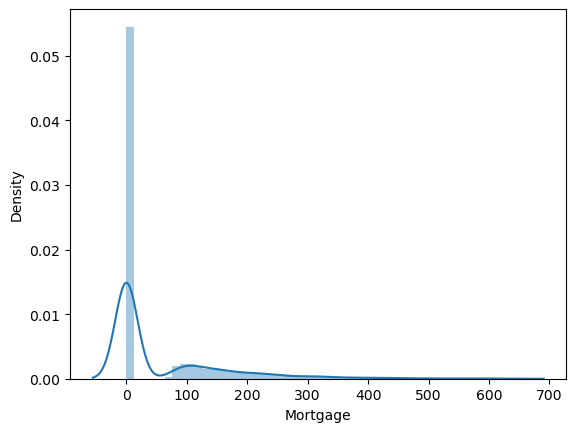

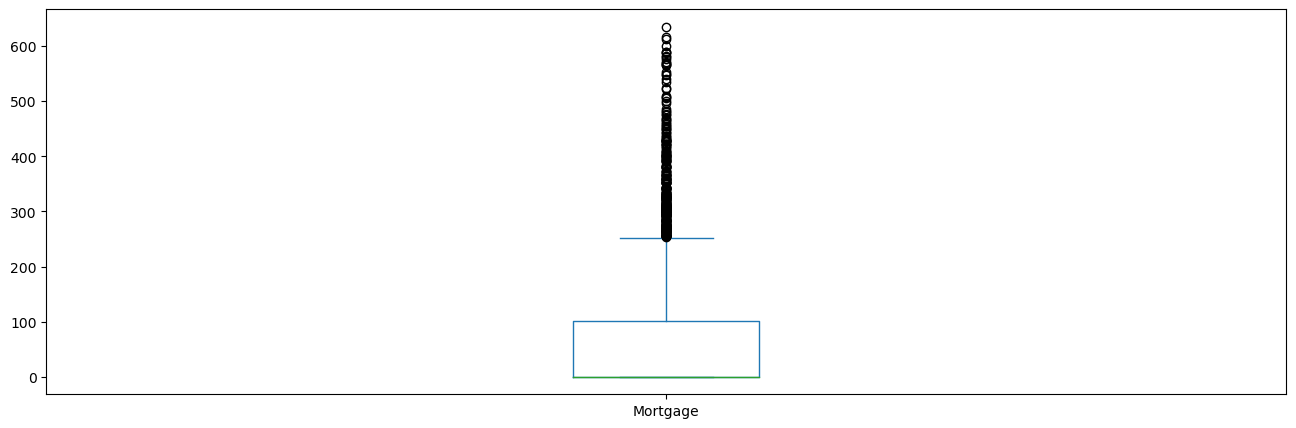

In [9]:
sns.distplot(df['Mortgage'])
plt.show()
df['Mortgage'].plot.box(figsize=(16, 5))
plt.show()

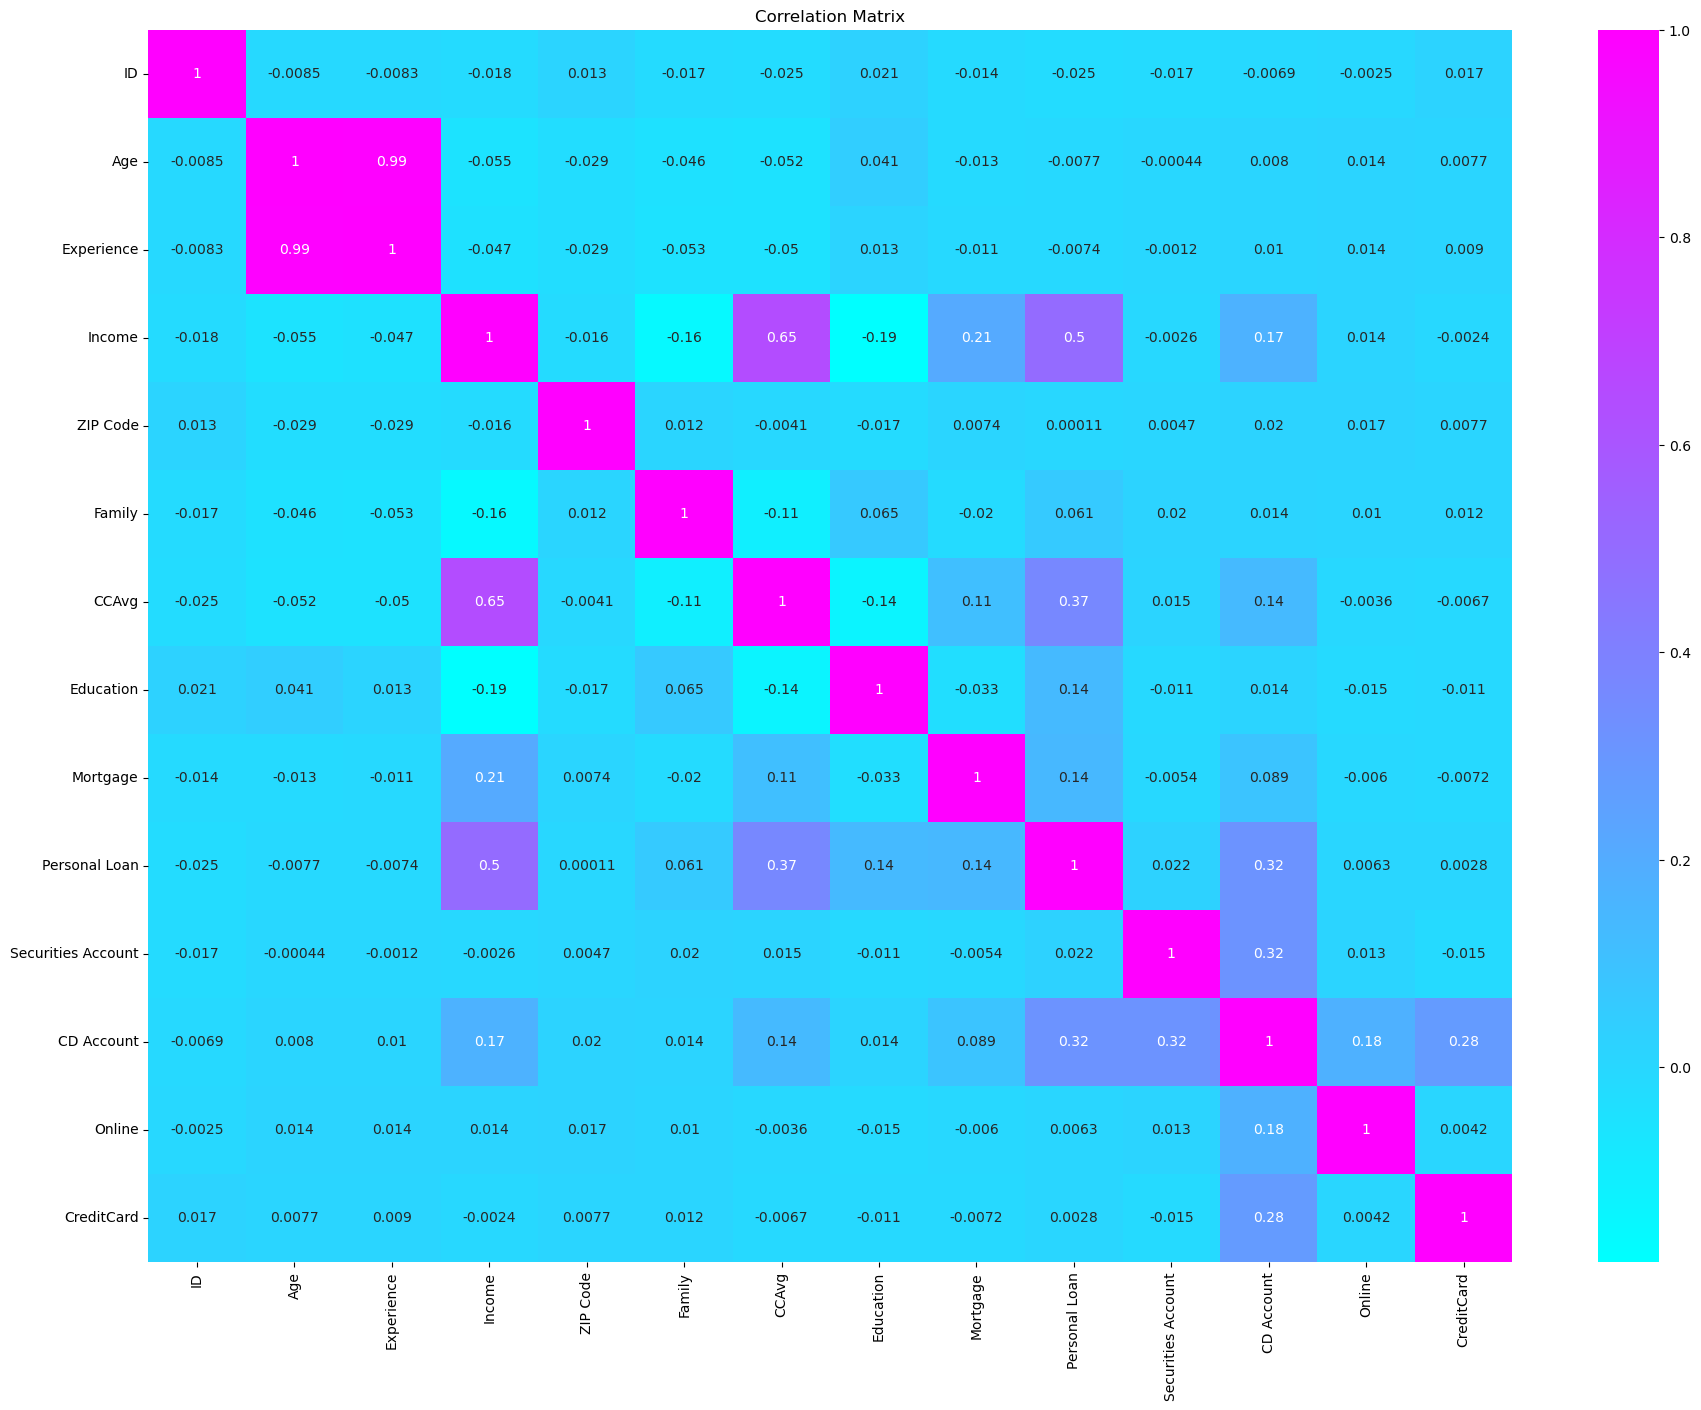

In [10]:
#Correlation Matrix of All Data
corr_matrix = df.corr()
plt.figure(figsize=(22, 16))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.show()

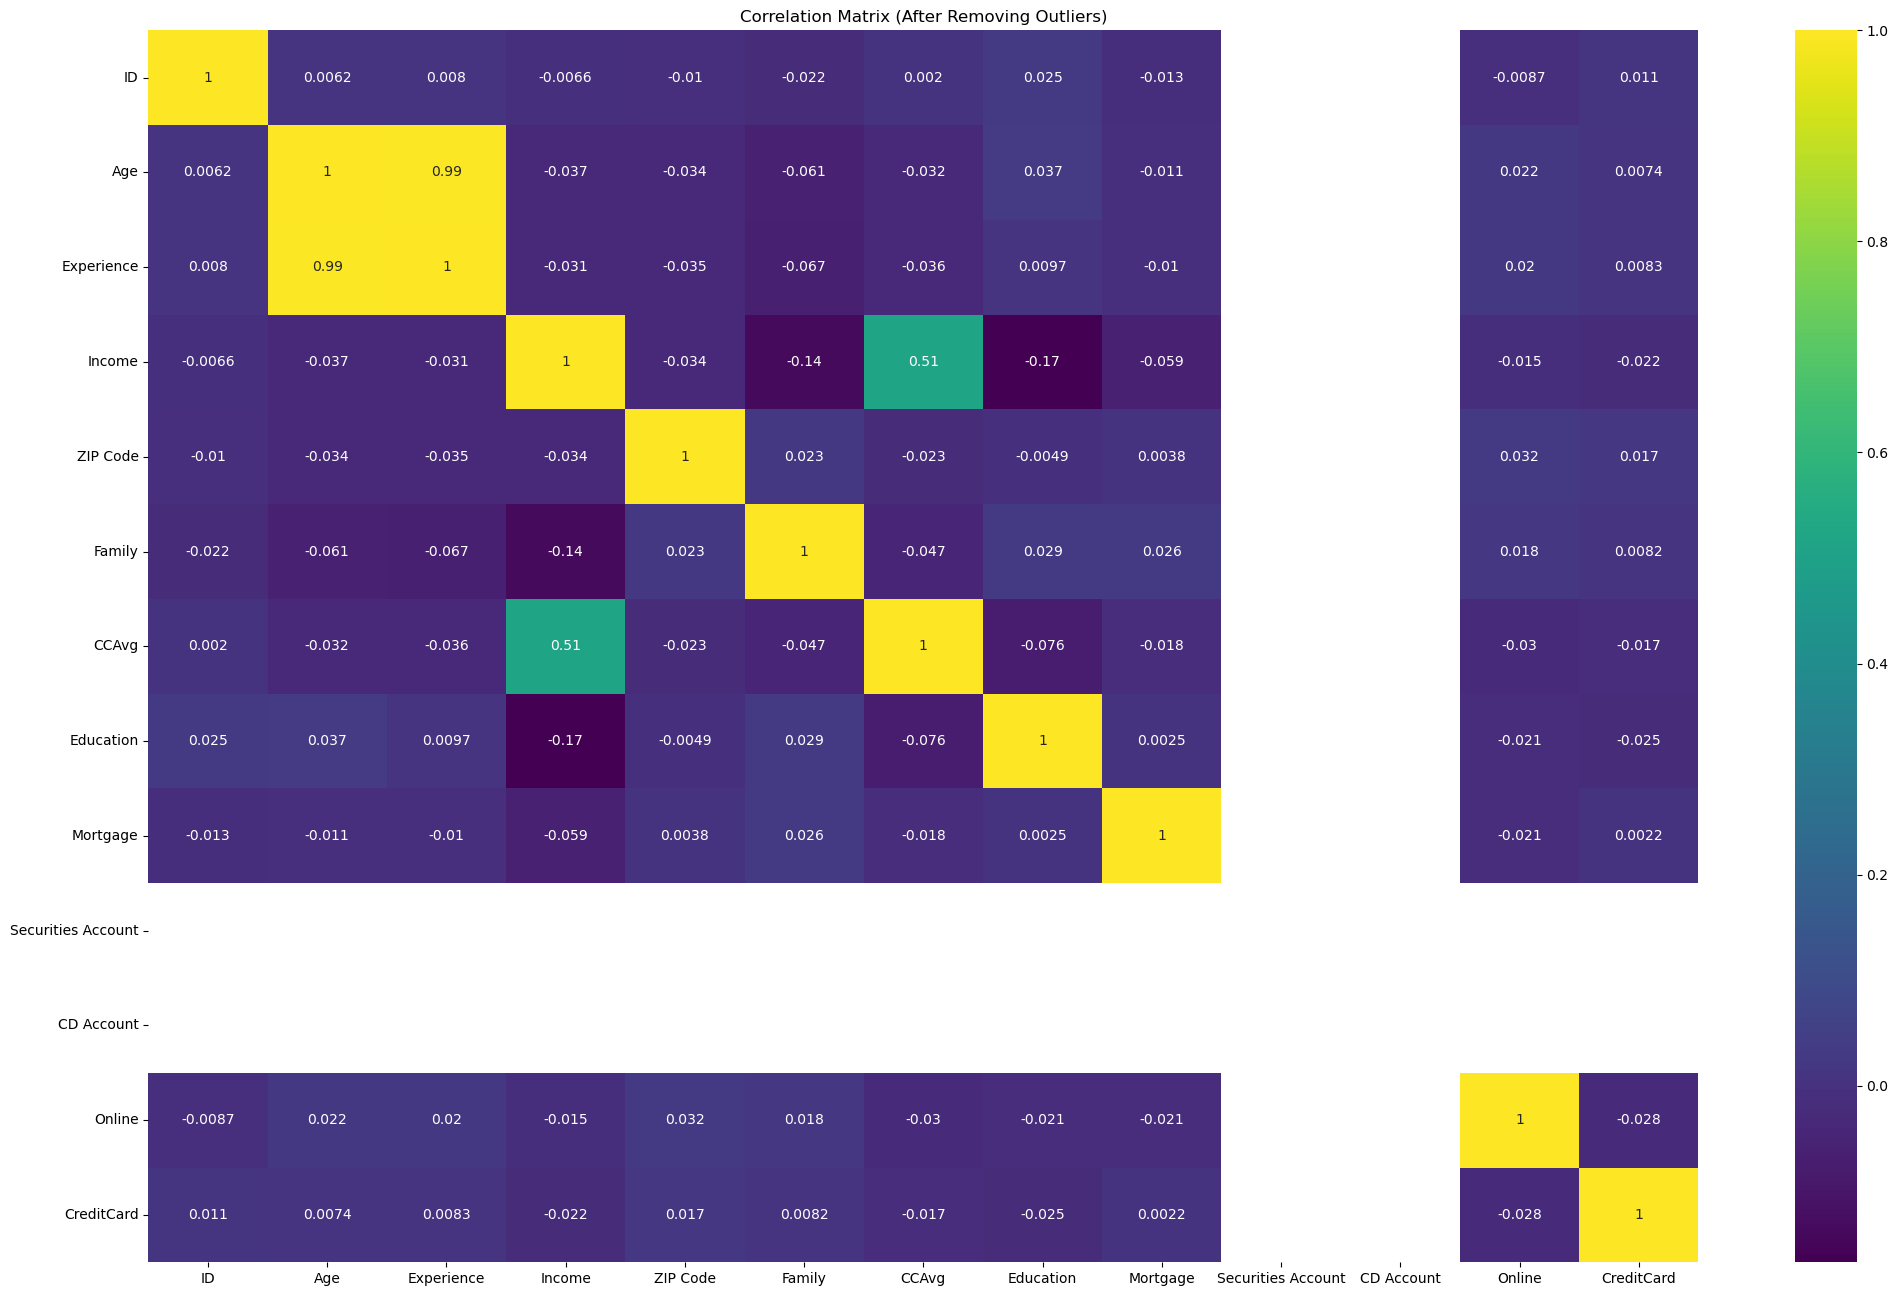

In [11]:
#Correlation Matrix Between All The Data Without The Personal Loan
X = df.drop(["Personal Loan"],axis = 1)
Y = df["Personal Loan"]
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X_aligned, _ = X.align(Q1, axis=1, copy=False)
X_aligned, _ = X_aligned.align(Q3, axis=1, copy=False)
outliers_mask = ((X_aligned < (Q1 - 1.5 * IQR)) | (X_aligned > (Q3 + 1.5 * IQR))).any(axis=1)
X_outliers_removed = X[~outliers_mask]

# Visualize the correlation matrix after removing outliers
corr_matrix = X_outliers_removed.corr()
plt.figure(figsize=(25, 16))
plt.title('Correlation Matrix (After Removing Outliers)')
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

In [12]:
#standarize the data then select best 5 features using SelectKBest and f_classif
scaler = StandardScaler()
X = scaler.fit_transform(X)
x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(X, Y)
x_data_varth = VarianceThreshold(.9).fit_transform(X)

In [13]:
#All data Cross validation score
cross_val_score(LogisticRegression(), X, Y, scoring='neg_log_loss').mean()

-0.1318991104913469

In [14]:
#best features cross validation score
cross_val_score(LogisticRegression(), x_data_kbest, Y, scoring='neg_log_loss').mean()

-0.14487609651658193

In [15]:
#lowest variance features cross validation score
cross_val_score(LogisticRegression(), x_data_varth, Y, scoring='neg_log_loss').mean()

-0.1318991104913469

In [16]:
#another way to make sure which features are the best and how many of them
selector = SequentialFeatureSelector(LogisticRegression(), scoring='neg_log_loss',verbose=2, k_features=8, forward=False, n_jobs=-1)
selector.fit(X, Y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    7.3s finished

[2023-08-31 11:00:59] Features: 12/8 -- score: -0.13147953121577477[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.6s finished

[2023-08-31 11:01:00] Features: 11/8 -- score: -0.1311558482875125[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.5s finished

[2023-08-31 11:01:00] Features: 10/8 -- score: -0.13114415232743643[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished

[2023-08-31 11:01:01] Features: 9/8 -- score: 

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(8, 8), n_jobs=-1, scoring='neg_log_loss',
                          verbose=2)

<Axes: >

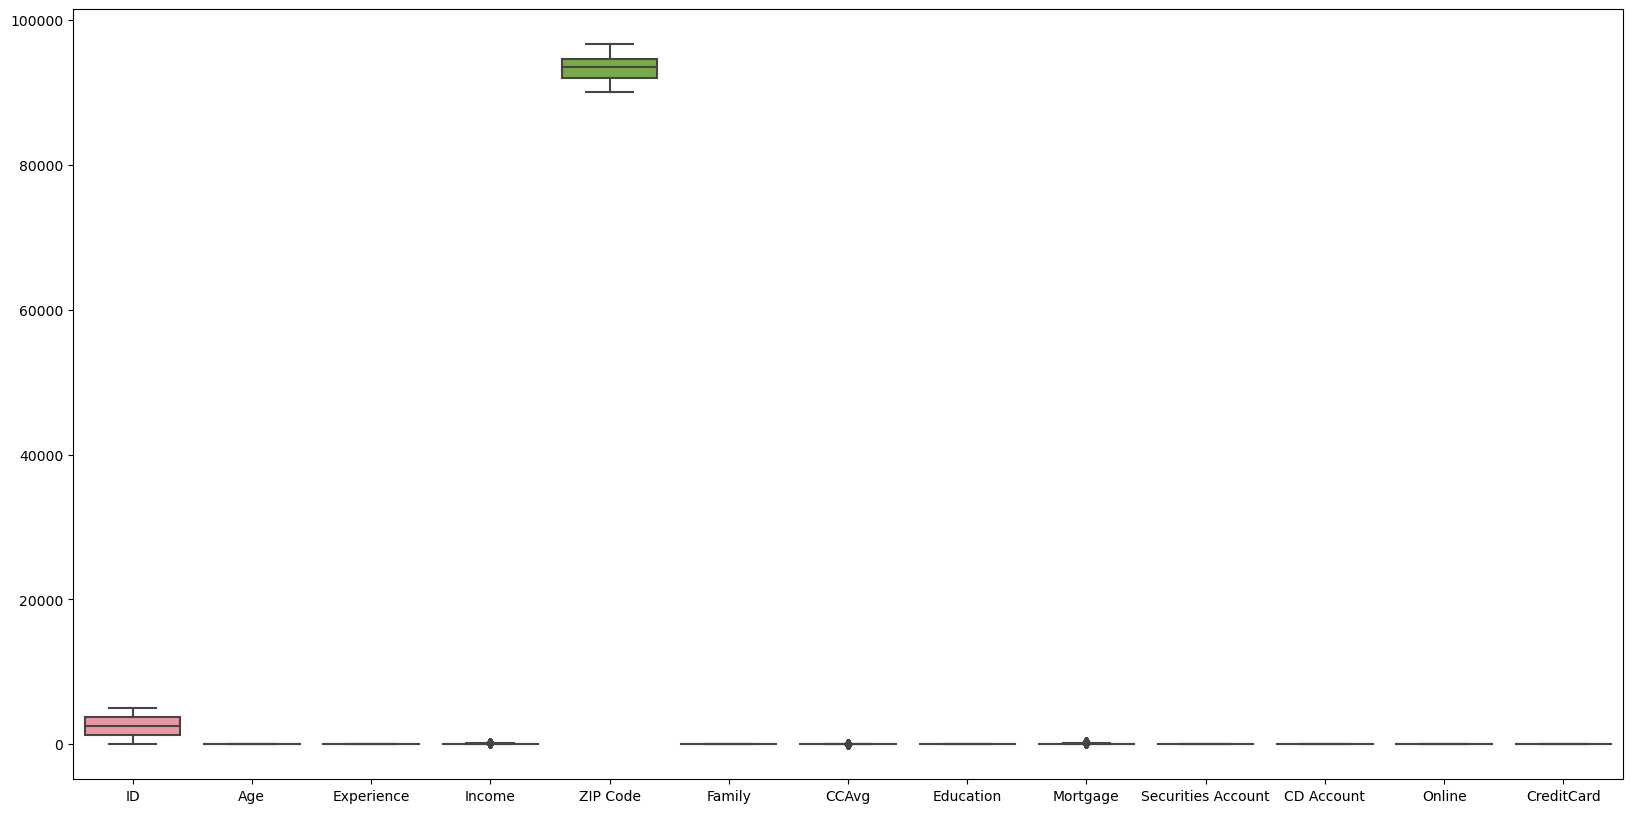

In [17]:
#boxplot of all the data
plt.figure(figsize =(20,10))
sns.boxplot(X_outliers_removed)

<Axes: >

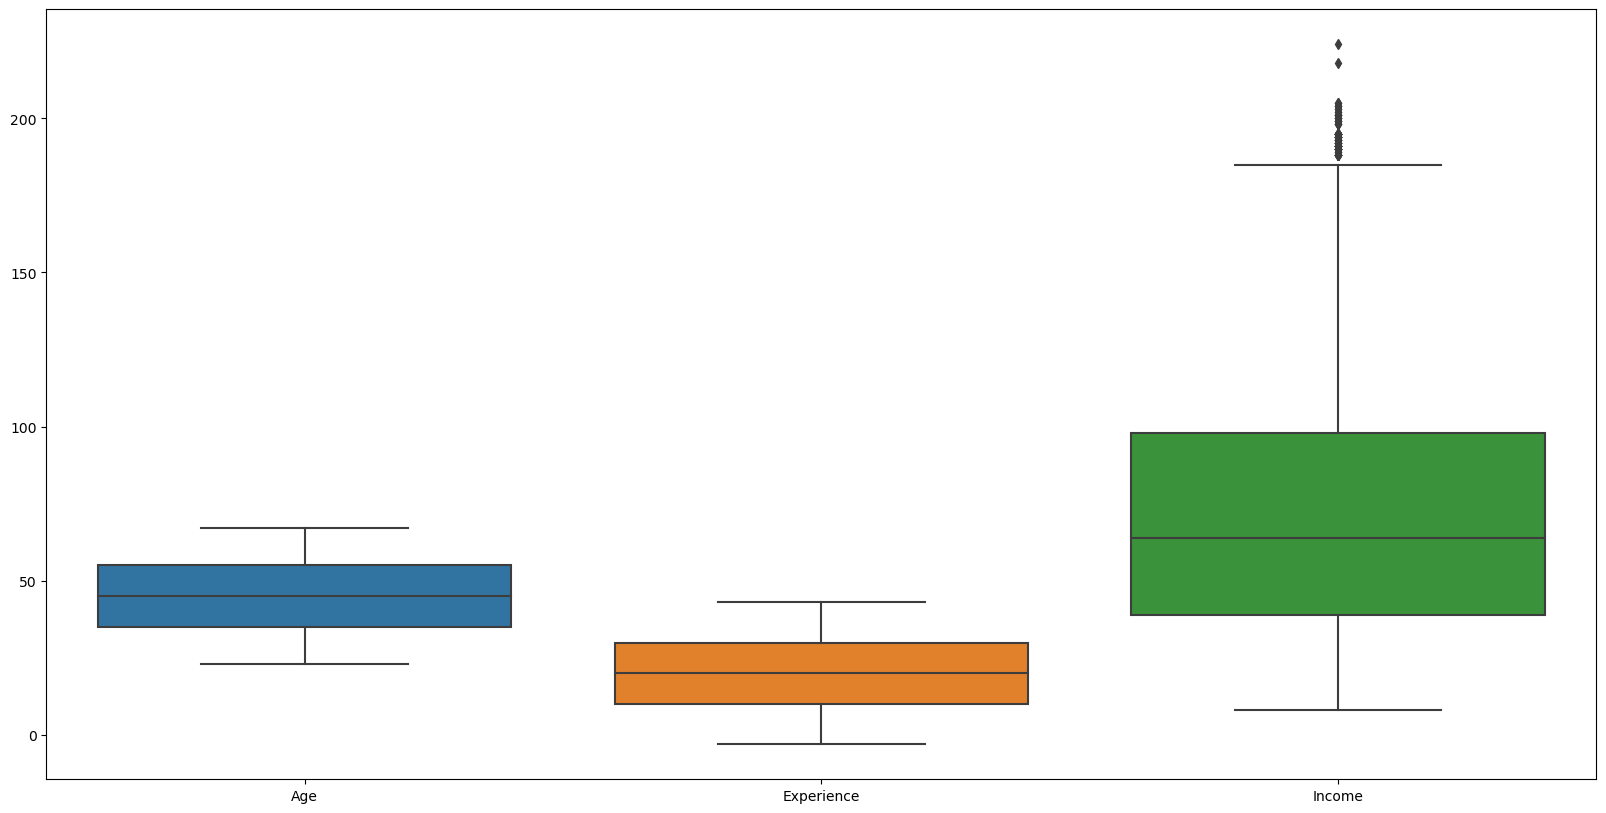

In [18]:
#Boxplot for the 3 features that we thought are the best from our observation at the correlation matrix
X = df[["Age","Experience","Income"]]
plt.figure(figsize =(20,10))
sns.boxplot(X)

In [19]:
#Select Best 5 Features Before Removing Outliers
X_new = df.drop(["ZIP Code"],axis = 1)
selector = SelectKBest(f_classif,k=5)
selector.fit(X_new,Y)
selected_columns = selector.get_support(indices=True)
X_fe = X_new.iloc[:, selected_columns]

S:\Anaconda\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


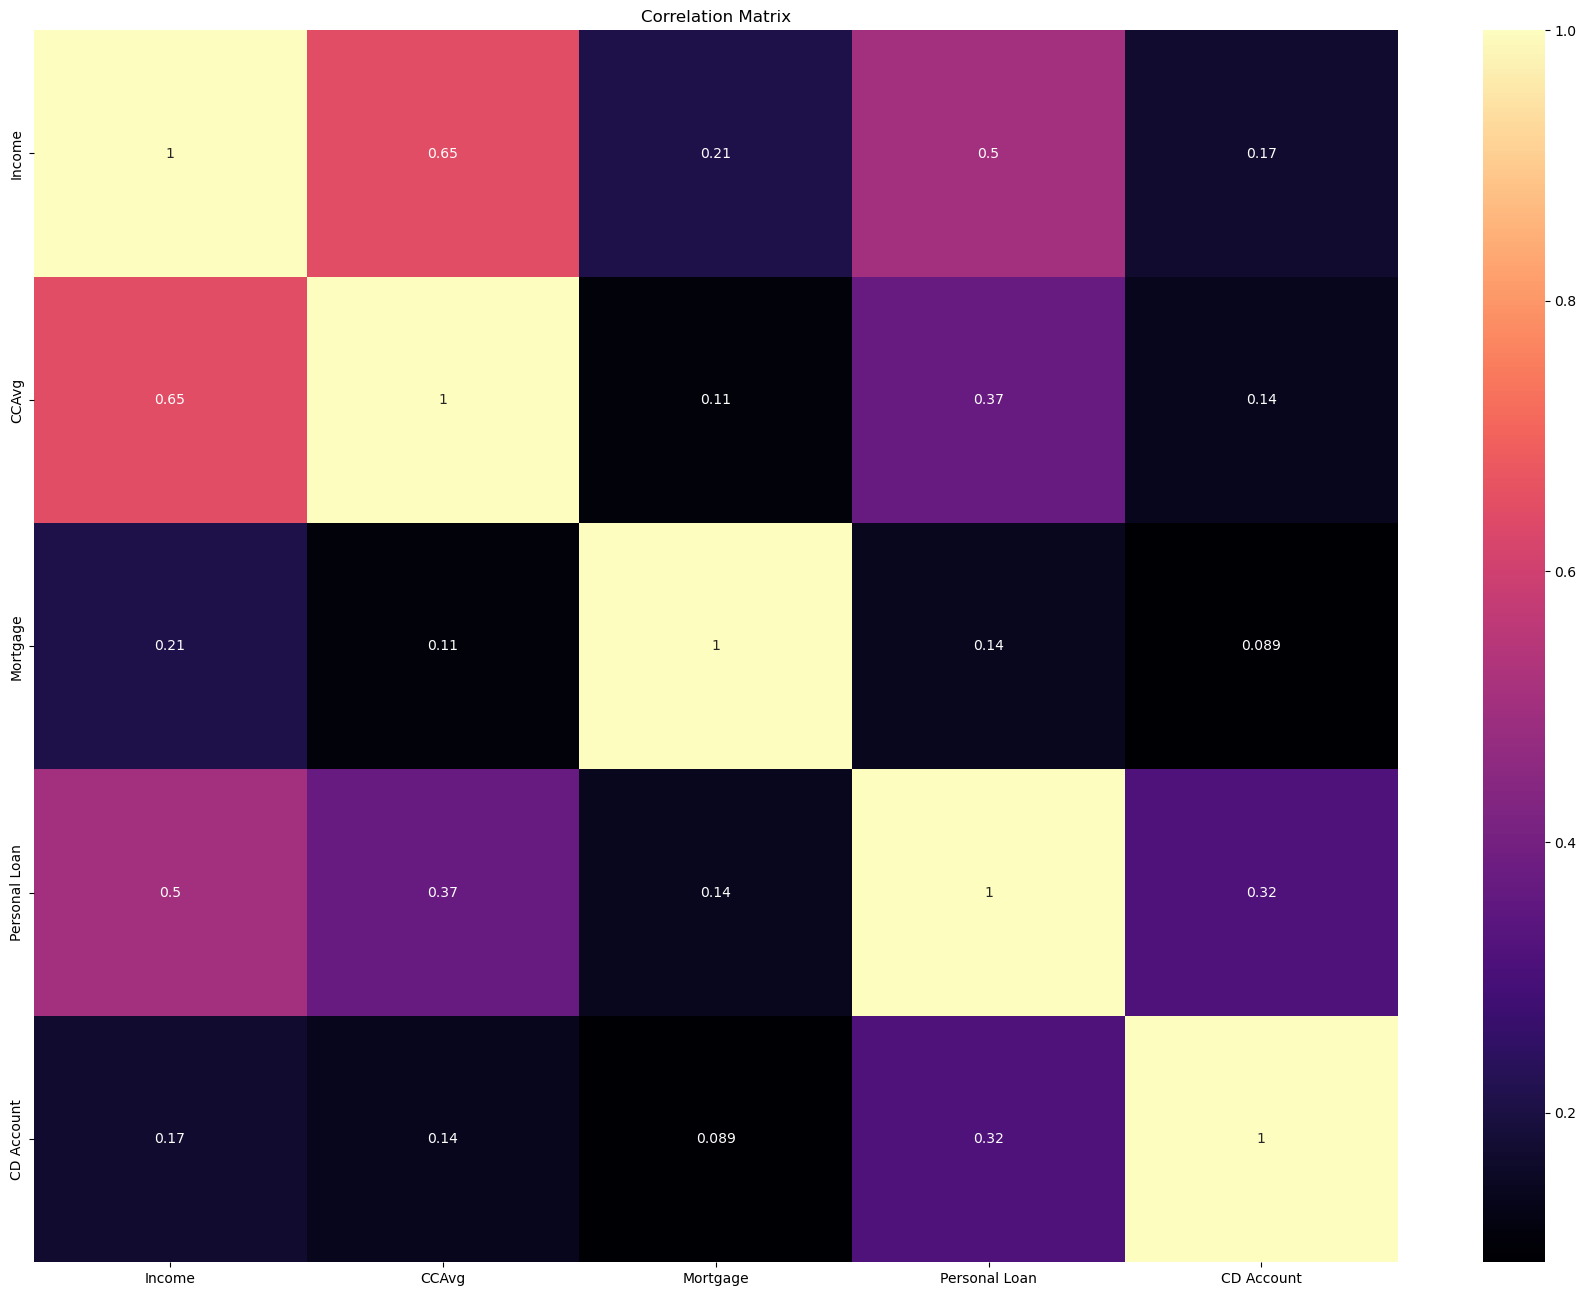

In [20]:
#Correlation Matrix of X_Features (X_fe) which has the best 5 features selected using SelectKBest
corr_matrix = X_fe.corr()
plt.figure(figsize=(22, 16))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.show()

<Axes: >

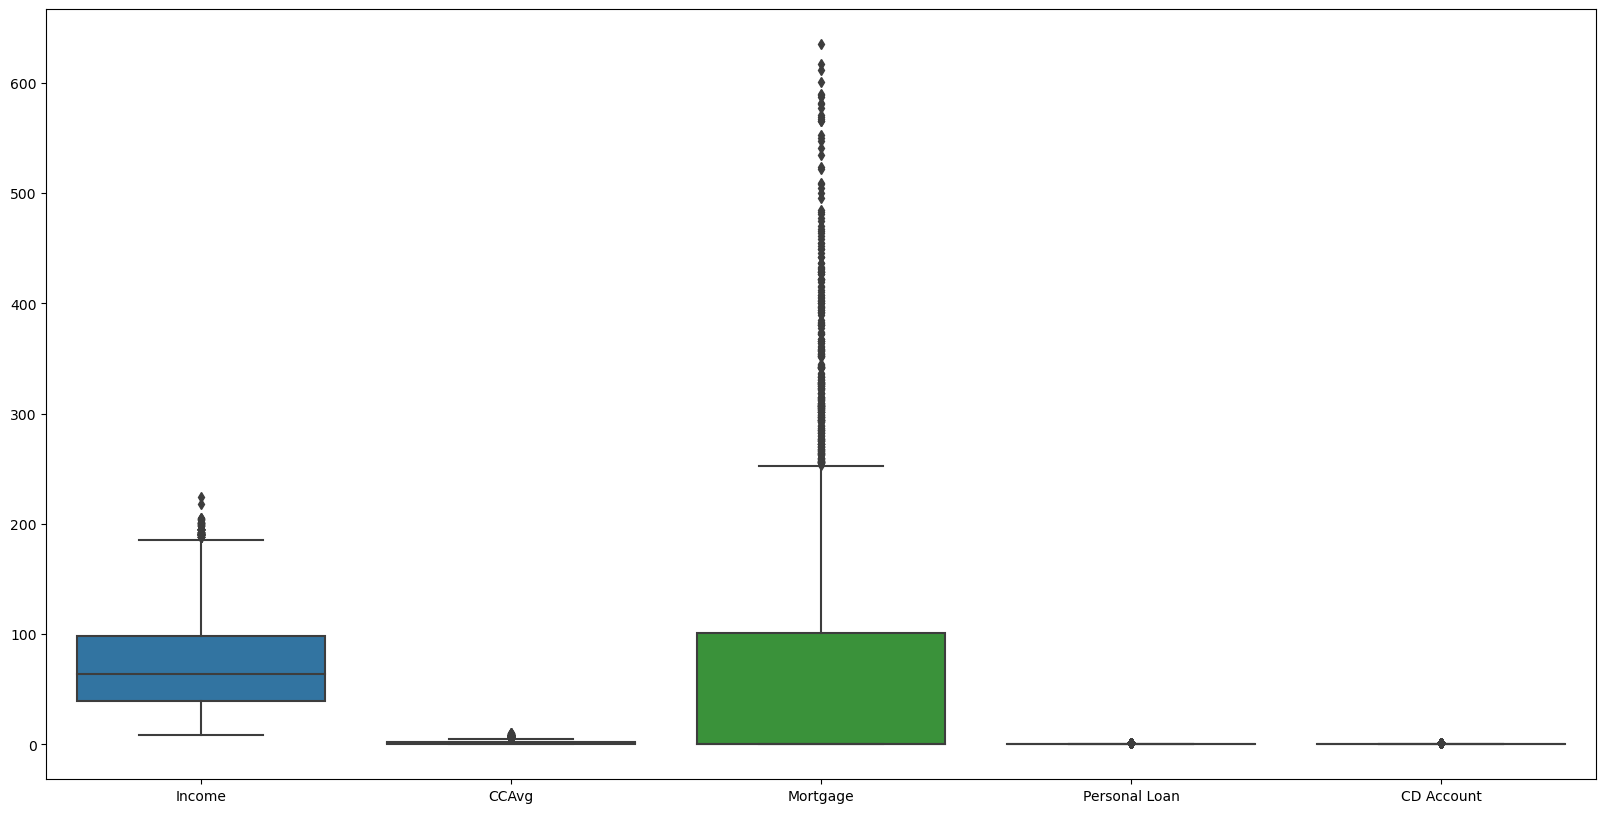

In [21]:
#Boxplot of the best 5 features (X_fe)
plt.figure(figsize =(20,10))
sns.boxplot(X_fe)

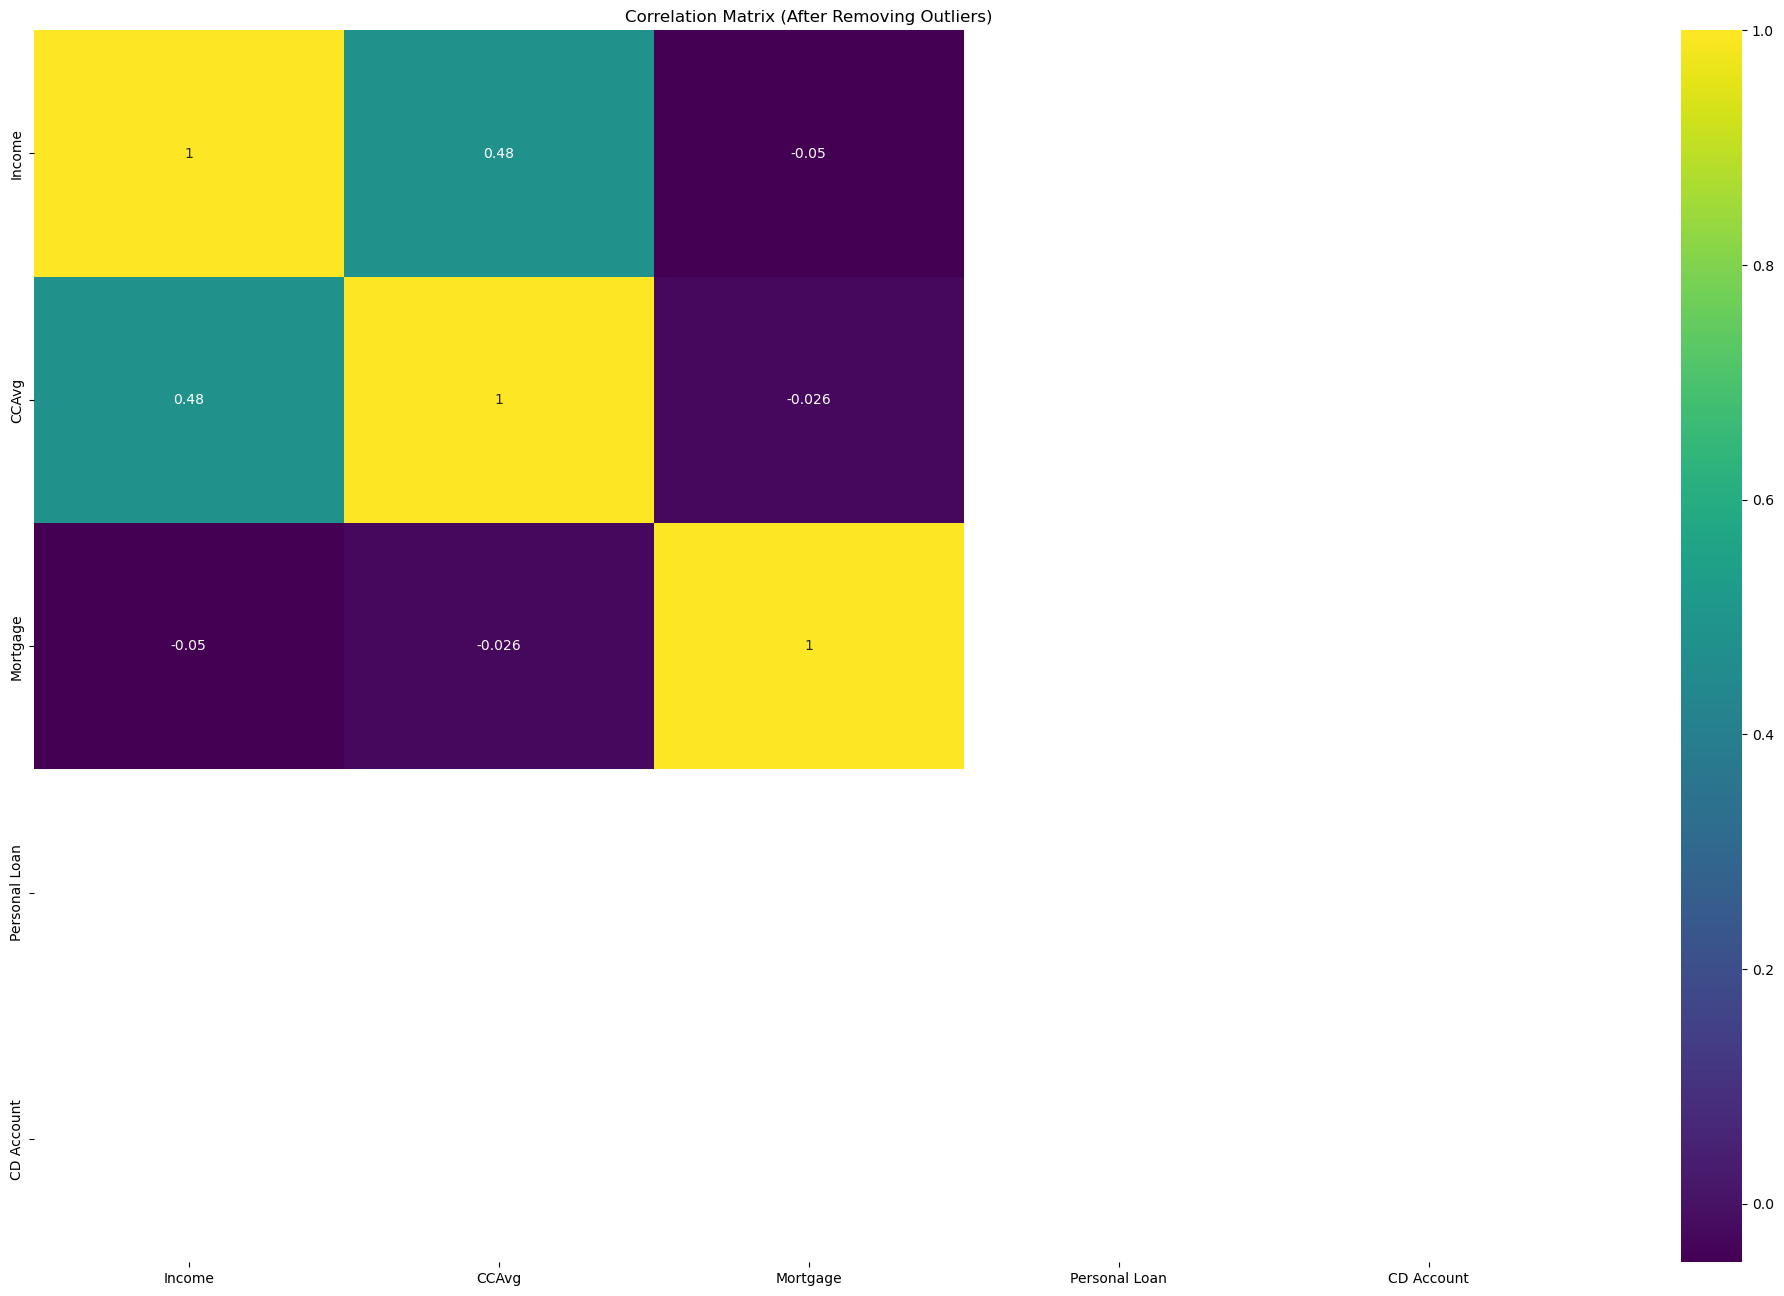

In [22]:
#Removing X_Features Outliers then Showing Correlation matrix
Q1 = X_fe.quantile(0.25)
Q3 = X_fe.quantile(0.75)
IQR = Q3 - Q1
X_outliers_removed_1 = X_fe[~((X_fe < (Q1 - 1.5 * IQR)) | (X_fe > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualize the correlation matrix after removing outliers
corr_matrix = X_outliers_removed_1.corr()
plt.figure(figsize=(25, 16))
plt.title('Correlation Matrix (After Removing Outliers)')
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

<Axes: >

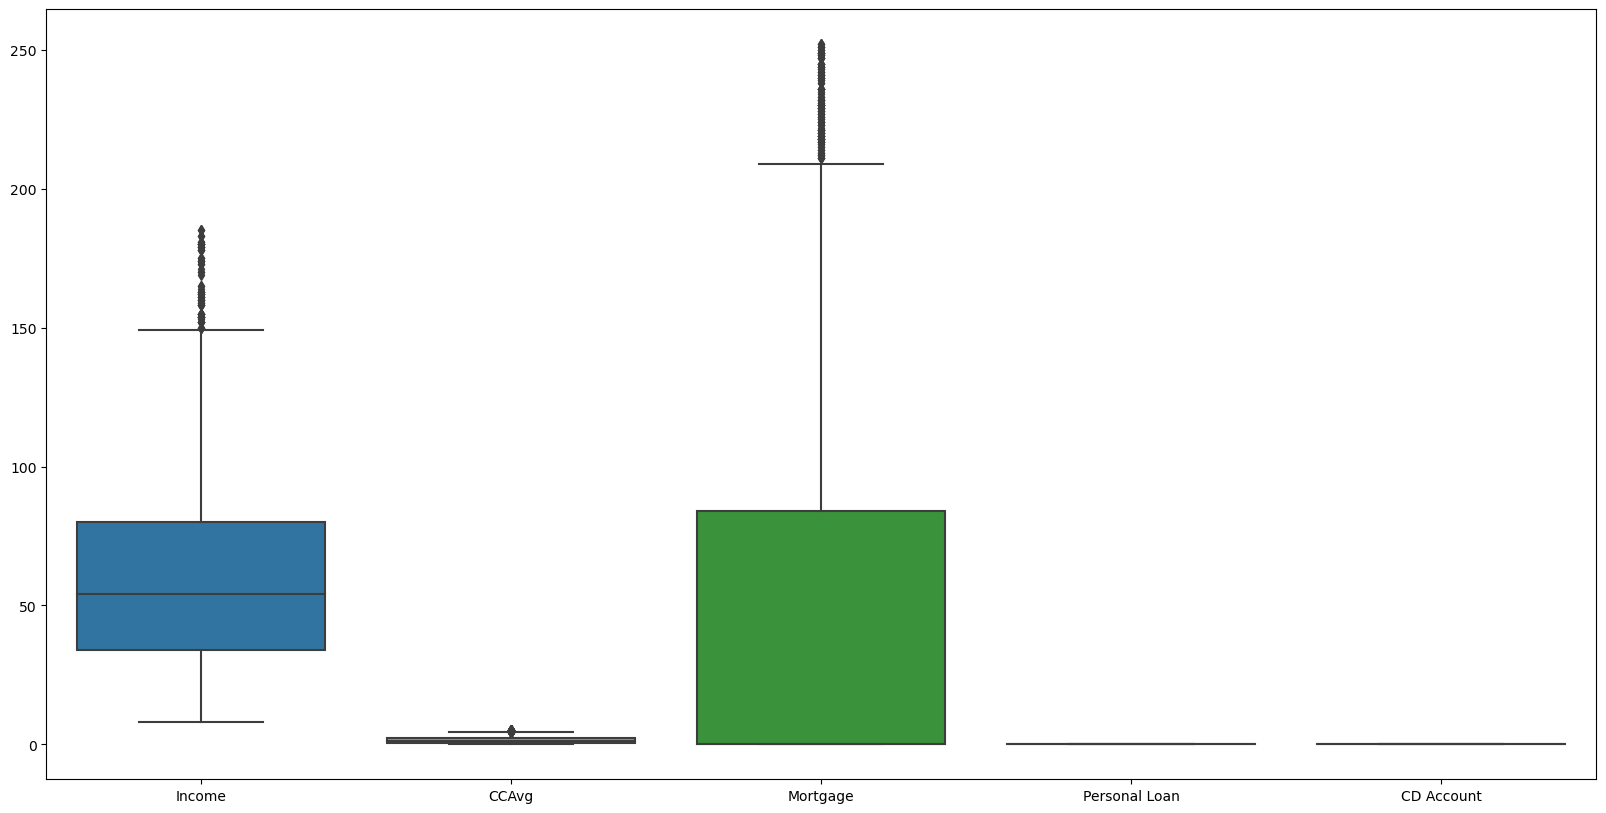

In [23]:
#boxplot of X_fe after removing the outliers
plt.figure(figsize =(20,10))
sns.boxplot(X_outliers_removed_1)

### Task 4: create a model that fits the data

In [24]:
#Split data 70% 30%
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=41)
# create Decision Tree classifer object
clf_31 = DecisionTreeClassifier()
param_grid = [{'criterion':['gini'], 'max_depth':list(range(1,16))},
               {'criterion':['entropy'], 'max_depth':list(range(1,16))}]
# create a grid search object
gs = GridSearchCV(clf_31, param_grid, scoring='accuracy', cv=10)
# fit model using grid search
gs = gs.fit(X_train,y_train)

#set the clf to the best combination of parameters
clf_best1 = gs.best_estimator_
print("best model:", clf_best1.get_params())
# Fit the best model to the data.
clf_best1 = clf_best1.fit(X_train, y_train)

y_pred = clf_best1.predict(X_test)
print(accuracy_score(y_test, y_pred))

best model: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
0.9093333333333333


In [25]:
#Split data 70% 30%
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=41)
clf_32 = DecisionTreeClassifier()
param_grid = [{'criterion':['gini'], 'max_depth':list(range(1,16))},
               {'criterion':['entropy'], 'max_depth':list(range(1,16))}]

gs = RandomizedSearchCV(clf_32, param_grid, scoring='accuracy', cv=10)
# create a grid search objective
gs = gs.fit(X_train,y_train)

#set the clf to the best combination of parameters
clf_best2 = gs.best_estimator_
print("best model:", clf_best2.get_params())
# Fit the best model to the data.
clf_best2 = clf_best2.fit(X_train, y_train)

y_pred = clf_best2.predict(X_test)
print(accuracy_score(y_test, y_pred))

best model: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
0.908


Accuracy on training data: 0.9874285714285714
Accuracy on test data: 0.9866666666666667


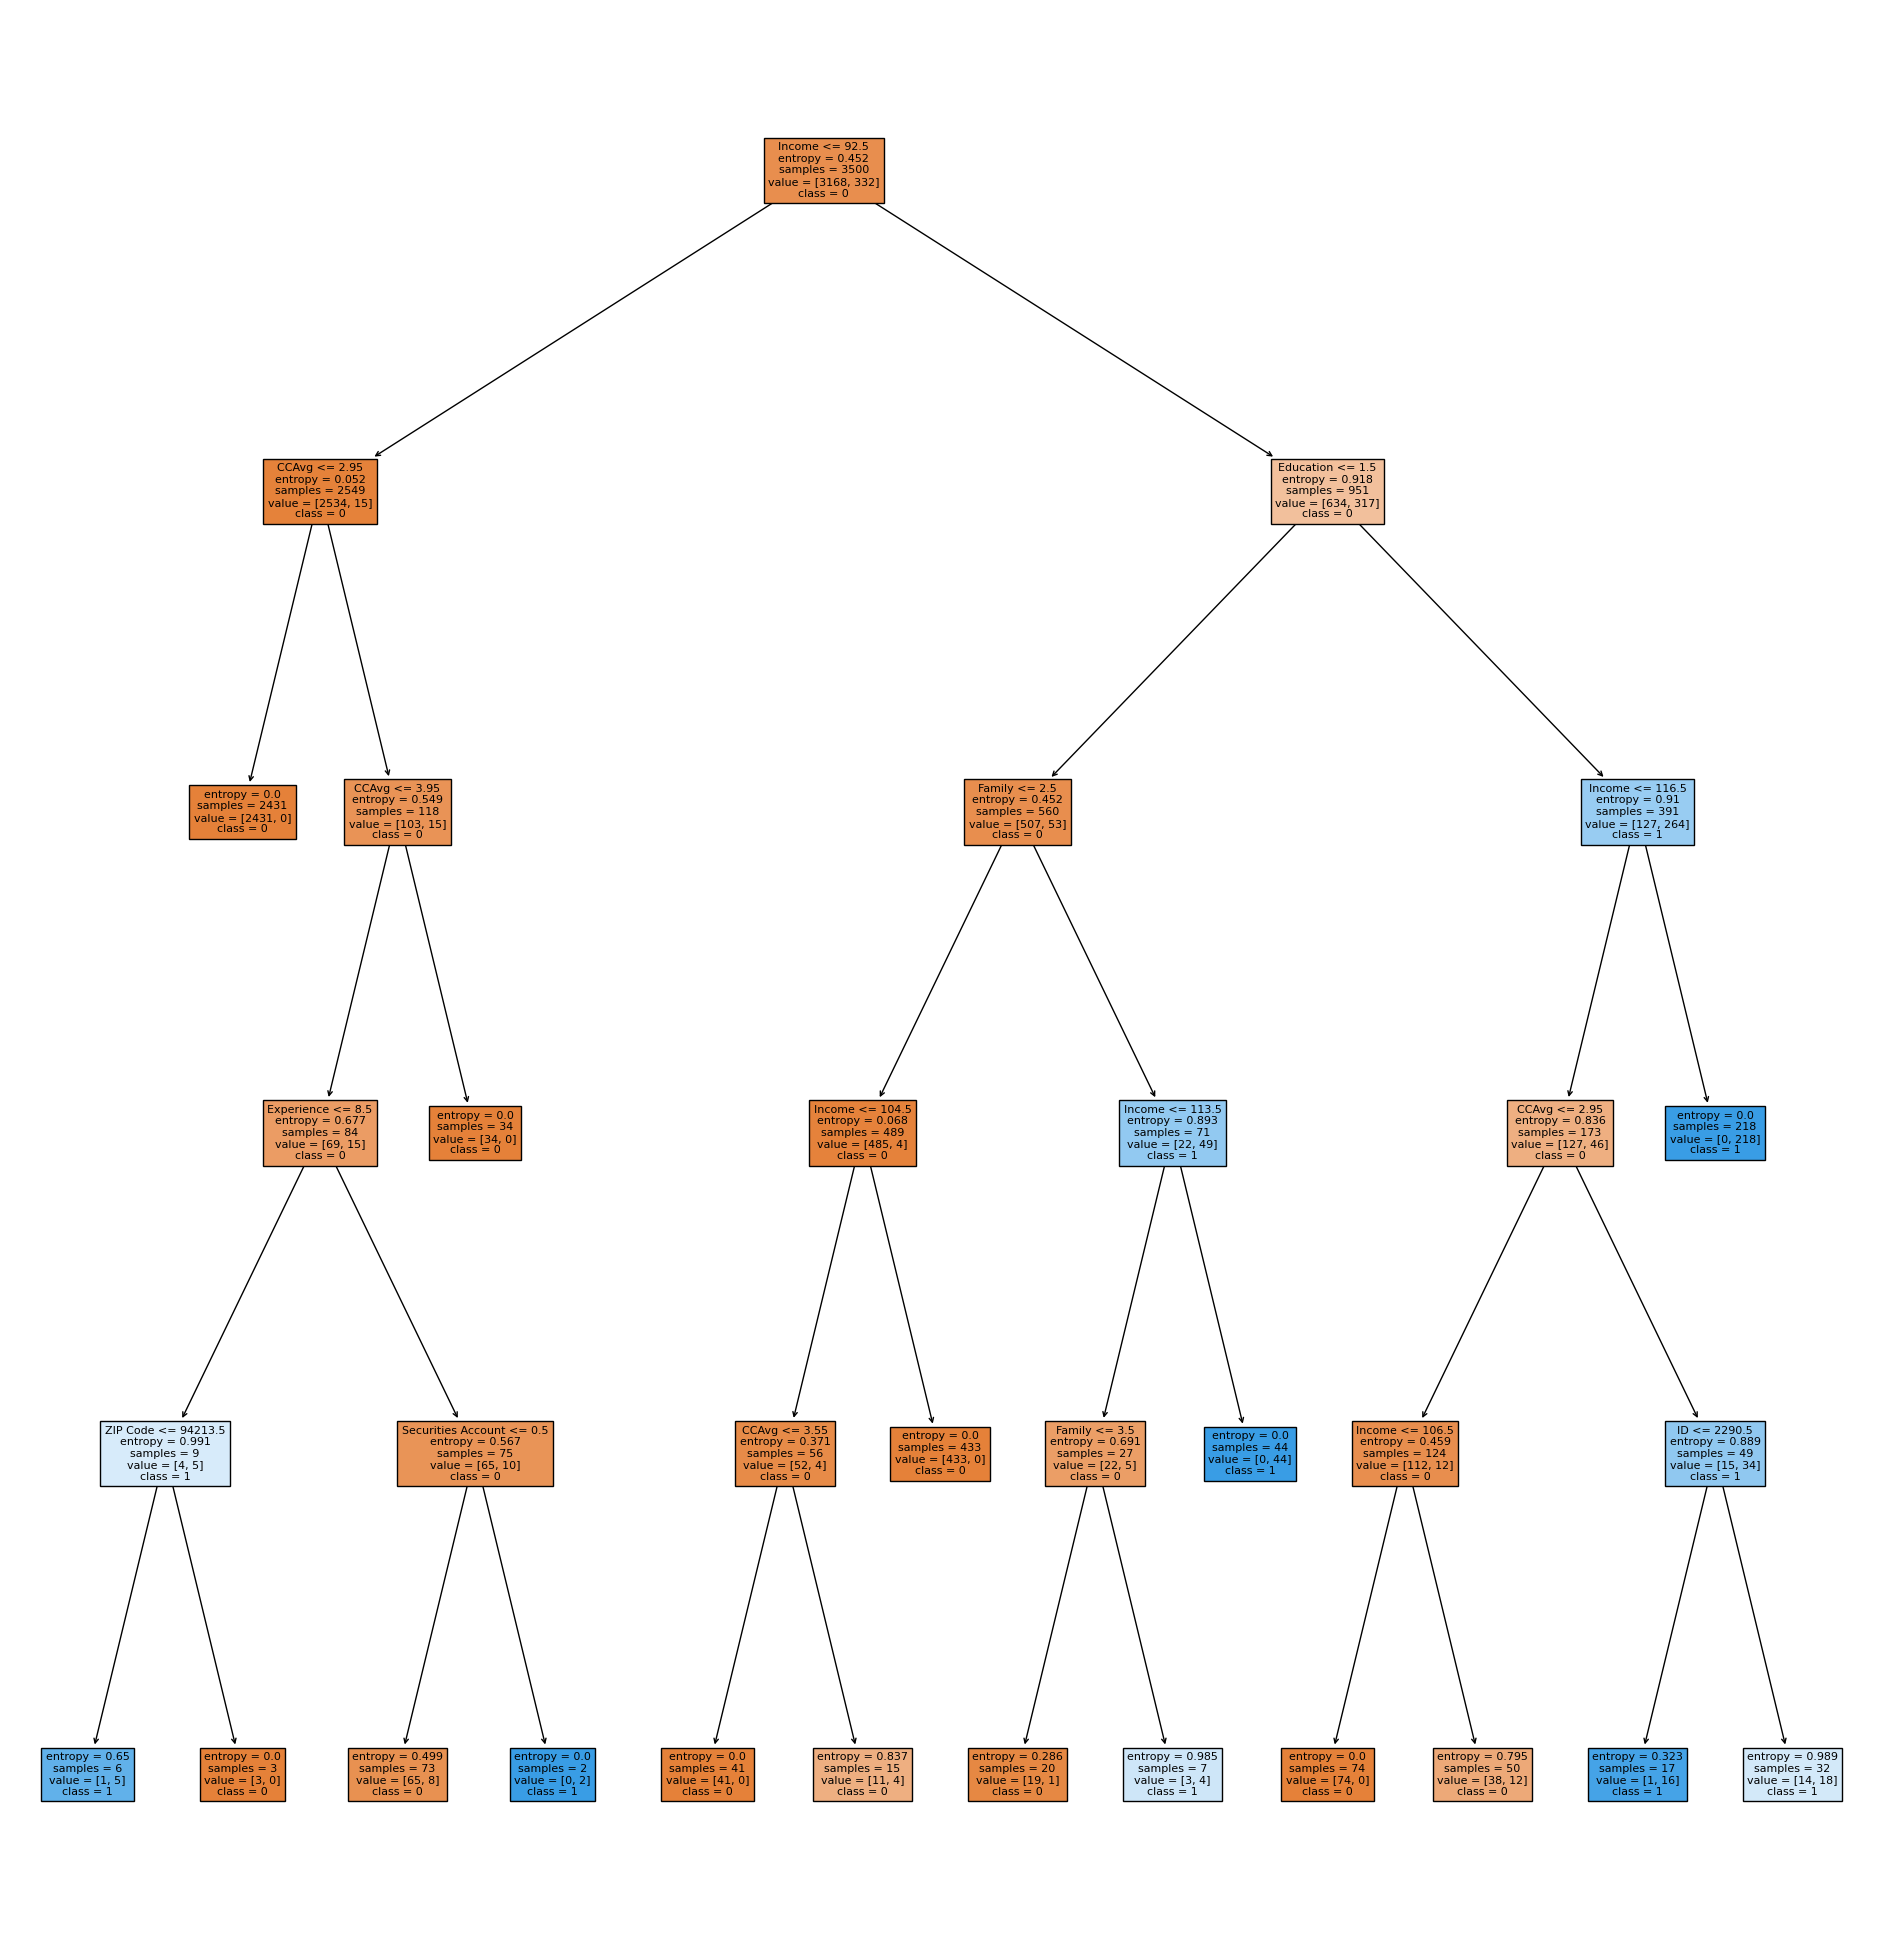

In [26]:
X = df.drop(["Personal Loan"],axis = 1) #Personal Loan  is excluded
y = df["Personal Loan"] #target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4) # 20% for test data

clf_3 = DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf_3 = clf_3.fit(X_train,y_train)
y_pred = clf_3.predict(X_train) #accuracy on training data
print("Accuracy on training data:",accuracy_score(y_train, y_pred))
y_pred = clf_3.predict(X_test)  #accuracy on  test data
print("Accuracy on test data:",accuracy_score(y_test, y_pred))

fig = plt.figure(figsize=(24,25)) # plot tree
_ = tree.plot_tree(clf_3, feature_names=df.columns, class_names =['0','1'], filled=True)

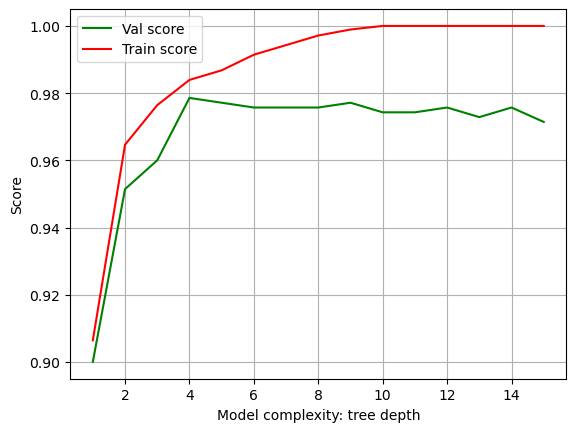

In [27]:
#Split data 70% 30%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)
#Split data 90% 10%
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4)
max_depth_range = range(1, 16)
val_results = []
train_results = []
for k in max_depth_range:
    clf_4 = DecisionTreeClassifier(max_depth=k)
    clf_4 = clf_4.fit(X_train_new, y_train_new)
    #accuracy on training
    pred_train_new = clf_4.predict(X_train_new)
    train_score = accuracy_score(y_train_new, pred_train_new)
    train_results.append(train_score)
    #accuracy on validation data
    pred_val = clf_4.predict(X_val)
    val_score = accuracy_score(y_val, pred_val)
    val_results.append(val_score)
#plot the score curves on both validation and test datasets
plt.plot(max_depth_range, val_results, 'g-', label='Val score')
plt.plot(max_depth_range, train_results, 'r-', label='Train score')
plt.ylabel('Score')
plt.xlabel('Model complexity: tree depth')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
clf_best1 = DecisionTreeClassifier(max_depth=4)
clf_best1 = clf_best1.fit(X_train, y_train)
y_pred = clf_best1.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.984


In [29]:
# Split the dataset into training and testing sets
X_finish = df.drop(["Securities Account","CD Account","Personal Loan"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_finish, Y, test_size=0.3, random_state=42)
#Standarize the X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Evaluate the model
y_pred_logreg = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.942


In [30]:
#RandomForest Model
X_finish = df.drop(["Securities Account","CD Account","Personal Loan","ID"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_finish, Y, test_size=0.3, random_state=42)
rf = RandomForestClassifier()
# Define the hyperparameters and their possible values to be tuned
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(rf, param_grid, cv=5)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the Random Forest model with the best hyperparameters
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(accuracy)

0.9853333333333333


### Task 5: creating an accuracy table

In [31]:
#Metrics
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_score_logreg = f1_score(y_test, y_pred_logreg)

print("Logistic Regression Metrics:")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1-score: {f1_score_logreg}")

# Precision, Recall, and F1-score for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-score: {f1_score_rf}")

# Cross-validation for Logistic Regression
cv_logreg = cross_val_score(logreg, X_finish, Y, cv=StratifiedKFold(n_splits=5))
print("Logistic Regression Cross-Validation Accuracy:")
print(cv_logreg)

# Cross-validation for Random Forest
cv_rf = cross_val_score(rf_best, X_finish, Y, cv=StratifiedKFold(n_splits=5))
print("Random Forest Cross-Validation Accuracy:")
print(cv_rf)

Logistic Regression Metrics:
Precision: 0.8070175438596491
Recall: 0.5859872611464968
F1-score: 0.6789667896678966
Random Forest Metrics:
Precision: 0.9927007299270073
Recall: 0.8662420382165605
F1-score: 0.9251700680272109


S:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
S:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Logistic Regression Cross-Validation Accuracy:
[0.914 0.898 0.915 0.937 0.903]
Random Forest Cross-Validation Accuracy:
[0.989 0.983 0.983 0.989 0.985]


### Model Deployment

In [32]:
# Save the Random Forest model rf_best
joblib_random = "random_forest_file"
joblib.dump(rf_best, joblib_random)

loaded_rand = joblib.load(open(joblib_random, 'rb'))

pred_Y = loaded_rand.predict(X_test)
result_forest = np.round(accuracy_score(y_test, y_pred_rf) ,2)
print(result_forest)

0.99
